<center><h2>COMP40020: Human Language Technologies
Assignment 1 </h2></center>


#### imports

In [68]:
import nltk
import re
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer



### references:
- Code was adapted from the following resources as well as code from the labs:
-  https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
- https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a
- https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

In [69]:
ci = "fQeiW15Vp7PWost_U0QkaA" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name


In [70]:

reddit = praw.Reddit(client_id=ci,
                     client_secret=cs,
                     user_agent=ua)




### sets to hold headlines

In [71]:
headlines = set()
headlines_newZealand = set()

### Looking at 900 new post titles 

In [72]:
# r/ireland
for submission in reddit.subreddit('ireland').new(limit=900):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

898


In [73]:
# r/newzealand
for submission in reddit.subreddit('newzealand').new(limit=900):
    headlines_newZealand.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand))

900


### r/ireland

In [74]:
# function for sentiment analysis 
def sia_function(headlines):

    sia = SIA()
    results = []

    for line in headlines:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
        
    return results

    

In [75]:
# sentiment intensity analyser 

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0, 'headline': 'Nova Noise', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': "If you were looking for these - they've been discontinued!!",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.6249,
  'headline': 'How awesome is your Ma?',
  'neg': 0.0,
  'neu': 0.494,
  'pos': 0.506}]


### r/newzealand

In [76]:
results_nz = sia_function(headlines_newZealand)
pprint(results_nz[:3], width=100)

[{'compound': 0.0, 'headline': 'Refund wait time', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.4019,
  'headline': 'Government policy changes help drive rents to record highs, Government survey finds',
  'neg': 0.0,
  'neu': 0.803,
  'pos': 0.197},
 {'compound': 0.0, 'headline': 'Moving to Palmerston North', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


### dataframe r/ireland

In [77]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Nova Noise
1,0.000,1.000,0.000,0.0000,If you were looking for these - they've been d...
2,0.000,0.494,0.506,0.6249,How awesome is your Ma?
3,0.337,0.663,0.000,-0.6808,Ex-Cavan GAA player assaulted journalist after...
4,0.185,0.700,0.115,-0.3400,Dublin Airport to host jobs fair to recruit hu...


### defining positive and negative label

In [78]:
def define_positive(df):
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = -1
    return df
    

In [79]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Nova Noise,0
1,0.000,1.000,0.000,0.0000,If you were looking for these - they've been d...,0
2,0.000,0.494,0.506,0.6249,How awesome is your Ma?,1
3,0.337,0.663,0.000,-0.6808,Ex-Cavan GAA player assaulted journalist after...,-1
4,0.185,0.700,0.115,-0.3400,Dublin Airport to host jobs fair to recruit hu...,-1


### dataframe r/newzealand

In [80]:
df_nz = pd.DataFrame.from_records(results_nz)
df_nz.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Refund wait time
1,0.000,0.803,0.197,0.4019,Government policy changes help drive rents to ...
2,0.000,1.000,0.000,0.0000,Moving to Palmerston North
3,0.159,0.591,0.250,0.2500,Broadcasting Standards Authority rules freedom...
4,0.000,0.809,0.191,0.5106,Reference to the 2nd New Zealand Division in n...


### defining positive and negative label

In [81]:
df_nz['label'] = 0
df_nz.loc[df_nz['compound'] > 0.2, 'label'] = 1
df_nz.loc[df_nz['compound'] < -0.2, 'label'] = -1
df_nz.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Refund wait time,0
1,0.000,0.803,0.197,0.4019,Government policy changes help drive rents to ...,1
2,0.000,1.000,0.000,0.0000,Moving to Palmerston North,0
3,0.159,0.591,0.250,0.2500,Broadcasting Standards Authority rules freedom...,1
4,0.000,0.809,0.191,0.5106,Reference to the 2nd New Zealand Division in n...,1


### example of positive and neg headlines r/ireland

In [82]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['How awesome is your Ma?',
 "Treat Yo'Self in Ballymun on point this morning...",
 "Happy International Women's' Day. On this International Women's' Day we celebrate the achievements and dedication of our Comrades. Ni saoirse go saoirse na mban - (There is no freedom until the "
 'freedom of women)',
 'Defence Forces to withdraw from United Nations Disengagement Observer Force on Golan Heights',
 'People Before Profit writes to Sinn Fein to form left alliance ahead of election']

Negative headlines:

['Ex-Cavan GAA player assaulted journalist after request not to cover court case refused',
 'Dublin Airport to host jobs fair to recruit hundreds of workers after last summer’s queue chaos',
 'IMO members reject €257,000-a-year public-only contract',
 'Nearly 2,000 AIB customers received 90% debt writedown · TheJournal.ie',
 'Irish Times poll: Majority of voters support ban on protests at DP centres, cap on those arriving']


### example of positive and neg headlines r/newzealand

In [83]:
print("Positive headlines:\n")
pprint(list(df_nz[df_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_nz[df_nz['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Government policy changes help drive rents to record highs, Government survey finds',
 'Broadcasting Standards Authority rules freedom of expression outweighed potential harm in RNZ interview about gender identity',
 'Reference to the 2nd New Zealand Division in new strategy video game Company of Heroes 3',
 'Help needed for census',
 'Best cheese for pizza that isn’t mozzarella?']

Negative headlines:

['Pharmac chairman Steve Maharey offers resignation over columns',
 'ird communication is terrible.',
 'Watch live: Feelings of fear ‘justified and fair’ says PM Chris Hipkins; more police resource for Hawke’s Bay',
 'Does anyone know what type of mushrooms these are? Pic is of a small one, but they grow larger - they are yellow and black. Are they poisonous to dogs?',
 "Why it floods wood on NZ's East Coast | John Campbell on Forestry Slash"]


### looking at value counts r/ireland

In [84]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    490
 1    206
-1    202
Name: label, dtype: int64
 0    54.565702
 1    22.939866
-1    22.494432
Name: label, dtype: float64


### looking at value counts r/newzealand

In [85]:
print(df_nz.label.value_counts())
print(df_nz.label.value_counts(normalize=True) * 100)

 0    510
-1    200
 1    190
Name: label, dtype: int64
 0    56.666667
-1    22.222222
 1    21.111111
Name: label, dtype: float64


### graph comparing results 

code adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged 

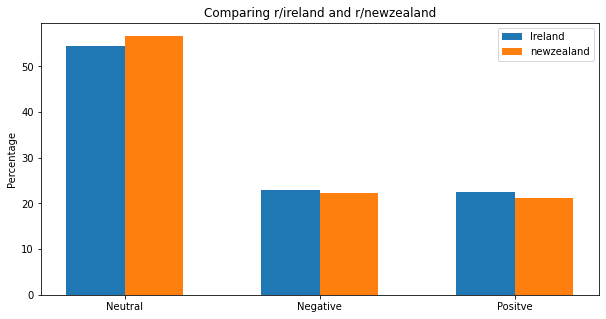

In [87]:
counts_nz = df_nz.label.value_counts(normalize=True) * 100

counts_ireland = df.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (counts_ireland)
orange_bar = (counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Looking at headlines in more detail:

In [88]:
# tokenizer that only looks at words, removes punctuation and also treats new zealand as one token 
tokenizer = RegexpTokenizer(r'\b(?:New Zealand|new zealand)\b|[^\W\d]+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
#         removing stop words
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

### r/newzealand "positive" headlines

In [89]:
pos_lines_nz = list(df_nz[df_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('best', 20),
 ('nz', 20),
 ('help', 17),
 ('anyone', 13),
 ('good', 11),
 ('new zealand', 8),
 ('looking', 8),
 ('like', 8),
 ('new', 7),
 ('people', 7),
 ('government', 6),
 ('get', 6),
 ('please', 6),
 ('auckland', 6),
 ('census', 5),
 ('love', 5),
 ('top', 5),
 ('day', 5),
 ('live', 5),
 ('increase', 5)]

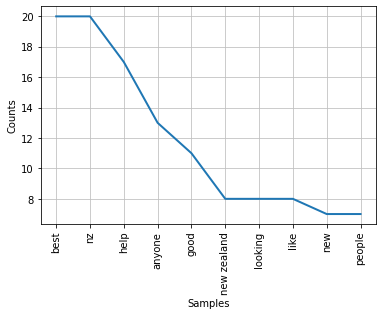

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [90]:
pos_freq_nz.plot(10)

### r/ireland - "positive" headlines 

In [51]:
pos_lines_ireland = list(df[df.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 32),
 ('irish', 21),
 ('like', 20),
 ('dublin', 16),
 ('anyone', 15),
 ('would', 14),
 ('best', 14),
 ('good', 12),
 ('free', 11),
 ('one', 10),
 ('looking', 9),
 ('house', 9),
 ('help', 9),
 ('2', 9),
 ('see', 8),
 ('new', 8),
 ('place', 8),
 ('people', 8),
 ('lads', 8),
 ('time', 7)]

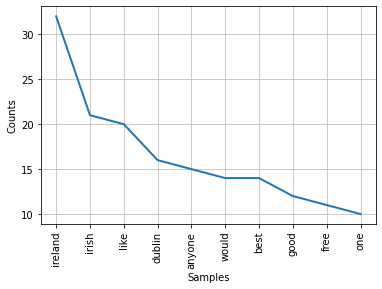

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
pos_freq_ireland.plot(10)

### r/newzealand "negative" headlines

In [56]:
neg_lines_nz = list(df_nz[df_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('nz', 21),
 ('new', 15),
 ('auckland', 15),
 ('cyclone', 14),
 ('police', 10),
 ('wrong', 9),
 ('murder', 8),
 ('gabrielle', 8),
 ('change', 8),
 ('zealand', 7),
 ('climate', 7),
 ('slash', 7),
 ('says', 6),
 ('campbell', 6),
 ('complaint', 6),
 ('forestry', 6),
 ('minister', 5),
 ('pharmac', 5),
 ('health', 5),
 ('work', 5)]

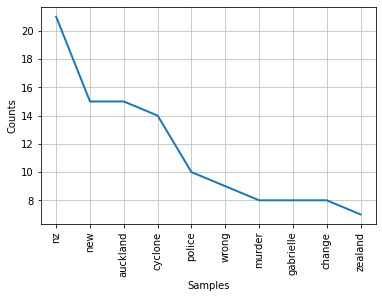

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [60]:
neg_freq_nz.plot(10)

### r/ireland - "negative" headlines 

In [57]:
neg_lines_ireland = list(df[df.label == -1].headline)

neg_tokens_ireland = process_text(neg_lines_ireland)
neg_freq_ireland = nltk.FreqDist(neg_tokens_ireland)

neg_freq_ireland.most_common(20)

[('irish', 18),
 ('ireland', 16),
 ('ban', 12),
 ('people', 11),
 ('dublin', 10),
 ('year', 9),
 ('eviction', 9),
 ('000', 7),
 ('car', 7),
 ('man', 7),
 ('go', 7),
 ('2', 6),
 ('end', 6),
 ('first', 6),
 ('murder', 6),
 ('would', 6),
 ('court', 6),
 ('u', 5),
 ('airport', 5),
 ('got', 5)]

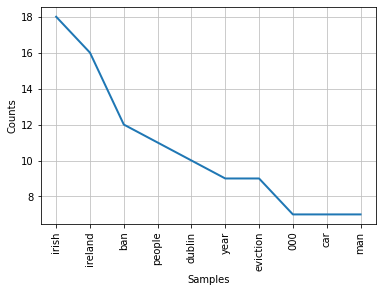

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
neg_freq_ireland.plot(10)

### Looking at top 900 post titles 

In [92]:
headlines_ireland_top = set()
headlines_newZealand_top = set()

In [93]:
for submission in reddit.subreddit('newzealand').top(limit=900):
    headlines_newZealand_top.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand_top))

900


In [94]:
for submission in reddit.subreddit('ireland').top(limit=900):
    headlines_ireland_top.add(submission.title)
    display.clear_output()
    print(len(headlines_ireland_top))

897


### Sentiment intensity analysis r/ireland

In [95]:
results_ireland_top =  sia_function(headlines_ireland_top)
pprint(results_ireland_top[:3], width=100)


[{'compound': 0.0, 'headline': '1.5 years to go', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'headline': 'Summer in Ireland', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Dublin cyclist picking out new bike for his bike-to-work scheme',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### Sentiment intensity analysis r/newzealand

In [96]:
results_newzealand_top =  sia_function(headlines_newZealand_top)
pprint(results_newzealand_top[:3], width=100)


[{'compound': -0.0772,
  'headline': 'Foreign donations to political parties over $50 to be banned in New Zealand',
  'neg': 0.18,
  'neu': 0.659,
  'pos': 0.162},
 {'compound': 0.4939, 'headline': 'Mountain friend.', 'neg': 0.0, 'neu': 0.238, 'pos': 0.762},
 {'compound': 0.0, 'headline': "New Zealand's Birds, by me!", 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [97]:
df_top_ireland = pd.DataFrame.from_records(results_ireland_top)
df_top_nz = pd.DataFrame.from_records(results_newzealand_top)


In [98]:
define_positive(df_top_ireland)

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,1.5 years to go,0
1,0.000,1.000,0.000,0.0000,Summer in Ireland,0
2,0.000,1.000,0.000,0.0000,Dublin cyclist picking out new bike for his bi...,0
3,0.247,0.599,0.154,-0.3612,Galway looking great last night. This was one ...,-1
4,0.000,1.000,0.000,0.0000,“I hear you’re a Frenchman now father”,0
...,...,...,...,...,...,...
892,0.071,0.804,0.125,0.4003,Fantastic news! We’ve just been informed that ...,1
893,0.191,0.508,0.301,0.5574,A harp my great grand uncle carved out of a bo...,1
894,0.000,1.000,0.000,0.0000,Covid 19 has jumped the Trampoline,0
895,0.000,1.000,0.000,0.0000,"The President’s dog, Síoda, has passed away. R...",0


In [99]:
define_positive(df_top_nz)

,neg,neu,pos,compound,headline,label
0,0.18,0.659,0.162,-0.0772,Foreign donations to political parties over $5...,0
1,0.00,0.238,0.762,0.4939,Mountain friend.,1
2,0.00,1.000,0.000,0.0000,"New Zealand's Birds, by me!",0
3,0.00,1.000,0.000,0.0000,Aotearoa Lofi study girl,0
4,0.00,1.000,0.000,0.0000,Stuff's stance on climate change reporting fro...,0
...,...,...,...,...,...,...
895,0.00,1.000,0.000,0.0000,The word we’ve all been looking for,0
896,0.00,1.000,0.000,0.0000,A message some people need.,0
897,1.00,0.000,0.000,-0.4404,Problematic,-1
898,0.00,1.000,0.000,0.0000,Lego Kakapo I recently finished,0


In [100]:
print("Positive headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == -1].headline)[:5], width=200)

Positive headlines r/ireland:

['Sharon congrats 😊',
 'Welcome to Sky Ireland',
 'An all-time fav',
 'Fuck it! 32 counties except they’re all Cork. One country will be deleted each day until only the best county on Earth remains.',
 'Fair point']

Negative headlines r/ireland:

['Galway looking great last night. This was one of many places ruined last night. Canals are just as bad.',
 "What is the quickest way you've seen someone ruin their life?",
 'To celebrate St. Patrick’s Day I decided to take my Miggle D. plushie on a monumental tour of as many of Dublin’s pubs/bars as possible. I initially set a target of 80 but he was a thirsty lil '
 'bastard so after 9 hours of cycling we managed to visit a whopping 214 locations!',
 'Shots fired by Osman ..',
 'That face when everyone thinks Americans invented Halloween. When in fact a majority of the traditions involved are not just Celtic, but Irish. Pack of bastards.']


In [101]:
print("Positive headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == -1].headline)[:5], width=200)

Positive headlines r/newzealand:

['Mountain friend.',
 'This will always be my favorite pic of John Key.',
 'Naughty and good 🐧 of the month is here!',
 'Also known as real interactions I have in a professional capacity. SIGH.',
 'Dominoes are trying to bring tipping culture to NZ - pay your staff properly instead please']

Negative headlines r/newzealand:

["Auckland Man who forced staff into 'economic slavery' paying them $6 per hour and forcing them to work 68 hour weeks through migrant exploitation - refused parole!",
 'Another day of ZERO cases. We zapping those suckers.',
 'Low effort sacrificing',
 'John Key resigning as Prime Minister, National Leader.',
 'Kia Ora to our new vaccination bus... Shot Bro!']


### looking at value counts

In [102]:
print(df_top_ireland.label.value_counts())
print(df_top_ireland.label.value_counts(normalize=True) * 100)

 0    482
 1    265
-1    150
Name: label, dtype: int64
 0    53.734671
 1    29.542921
-1    16.722408
Name: label, dtype: float64


In [103]:
print(df_top_nz.label.value_counts())
print(df_top_nz.label.value_counts(normalize=True) * 100)

 0    461
 1    282
-1    157
Name: label, dtype: int64
 0    51.222222
 1    31.333333
-1    17.444444
Name: label, dtype: float64


In [104]:
counts_ireland_top = df_top_ireland.label.value_counts(normalize=True) * 100
counts_nz_top = df_top_nz.label.value_counts(normalize=True) * 100


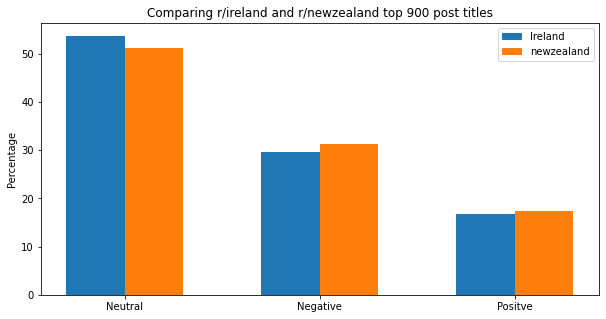

In [105]:
N = 3

blue_bar = (counts_ireland_top)
orange_bar = (counts_nz_top)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand top 900 post titles')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Looking at top 900 counts in more detail. 

In [106]:
pos_lines_ireland = list(df_top_ireland[df_top_ireland.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 43),
 ('irish', 30),
 ('like', 23),
 ('lads', 18),
 ('great', 17),
 ('day', 12),
 ('years', 12),
 ('one', 11),
 ('today', 11),
 ('dublin', 11),
 ('good', 9),
 ('happy', 9),
 ('true', 9),
 ('year', 9),
 ('time', 8),
 ('think', 8),
 ('sure', 8),
 ('best', 7),
 ('county', 7),
 ('last', 7)]

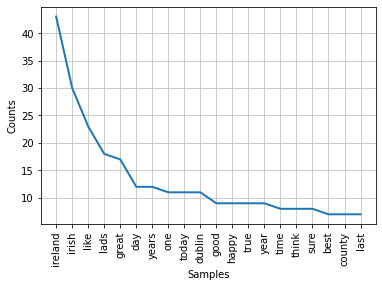

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [107]:
pos_freq_ireland.plot(20)


In [108]:
pos_lines_nz = list(df_top_nz[df_top_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('new zealand', 35),
 ('nz', 34),
 ('like', 29),
 ('good', 18),
 ('us', 13),
 ('new', 12),
 ('country', 11),
 ('today', 11),
 ('love', 11),
 ('made', 10),
 ('proud', 10),
 ('please', 9),
 ('people', 9),
 ('time', 8),
 ('free', 8),
 ('best', 8),
 ('day', 8),
 ('party', 8),
 ('kiwi', 8),
 ('thank', 8)]

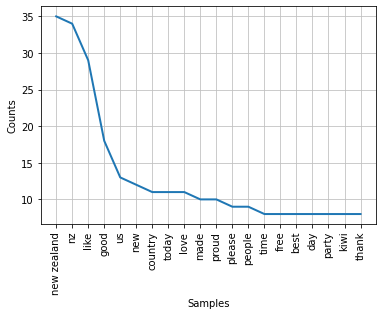

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [109]:
pos_freq_nz.plot(20)


In [111]:
neg_lines_ire = list(df_top_ireland[df_top_ireland.label == -1].headline)

neg_tokens_ire = process_text(neg_lines_ire)
neg_freq_ire = nltk.FreqDist(neg_tokens_ire)

neg_freq_ire.most_common(20)

[('irish', 19),
 ('ireland', 17),
 ('years', 12),
 ('dublin', 11),
 ('today', 11),
 ('one', 10),
 ('day', 8),
 ('ago', 8),
 ('people', 8),
 ('lads', 7),
 ('ya', 6),
 ('american', 6),
 ('get', 6),
 ('last', 5),
 ('died', 5),
 ('stop', 5),
 ('round', 5),
 ('like', 5),
 ('abuse', 5),
 ('got', 5)]

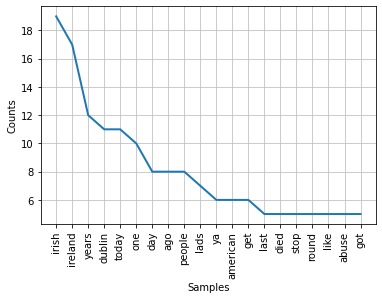

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [112]:
neg_freq_ire.plot(20)


In [113]:
neg_lines_nz = list(df_top_nz[df_top_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('new zealand', 29),
 ('nz', 16),
 ('fuck', 8),
 ('today', 8),
 ('world', 7),
 ('country', 7),
 ('police', 7),
 ('auckland', 6),
 ('man', 6),
 ('people', 6),
 ('covid', 6),
 ('shit', 6),
 ('new', 5),
 ('bad', 5),
 ('like', 5),
 ('crisis', 5),
 ('much', 5),
 ('get', 5),
 ('want', 5),
 ('day', 4)]

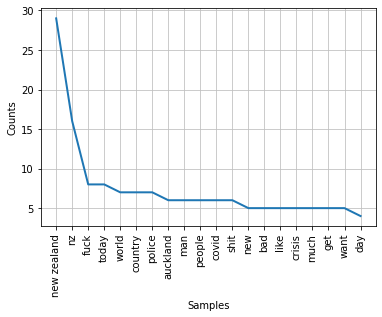

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [114]:
neg_freq_nz.plot(20)


### Looking at comments 

In [115]:
def sia_function(comments):

    sia = SIA()
    results = []

    for line in comments:
        pol_score = sia.polarity_scores(line)
        pol_score['comment'] = line
        results.append(pol_score)
        
    return results

### gathering comments from r/ireland

In [11]:
comments_ireland = set()
# r/ireland
for submission in reddit.subreddit('ireland').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_ireland.add(comment.body)
            display.clear_output()
            print(len(comments_ireland))

    


1485


### gathering comments from r/newzeland

In [23]:
comments_nz = set()
# r/ireland
for submission in reddit.subreddit('newzealand').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_nz.add(comment.body)
            display.clear_output()
            print(len(comments_nz))

    


1560


#### sentiment intensity analysis for comments r/ireland

In [17]:
comments_results_ireland = sia_function(comments_ireland)
pprint(comments_results_ireland[:3], width=100)

[{'comment': 'Scotland and Ireland joint hosts in 2030 LETS DO IT',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'comment': 'We need to abolish Real Estate Investment Trusts.',
  'compound': 0.4767,
  'neg': 0.0,
  'neu': 0.693,
  'pos': 0.307},
 {'comment': "Boris's sanctions should solve everything.....",
  'compound': 0.2023,
  'neg': 0.0,
  'neu': 0.69,
  'pos': 0.31}]


#### sentiment intensity analysis for comments r/newzealand

In [25]:
comments_results_newzealand = sia_function(comments_nz)
pprint(comments_results_newzealand[:3], width=100)

[{'comment': 'Why the fuck dose newzeland give a shit',
  'compound': -0.7964,
  'neg': 0.587,
  'neu': 0.413,
  'pos': 0.0},
 {'comment': 'The whole system in the US is designed to prevent someone like her from getting '
             'elected.',
  'compound': 0.3818,
  'neg': 0.0,
  'neu': 0.795,
  'pos': 0.205},
 {'comment': 'People talk about y2k like that now: that it was a lot of panic over no big deal. '
             'But the truth is a lot of people worked very hard to make it no big deal.',
  'compound': -0.4385,
  'neg': 0.213,
  'neu': 0.67,
  'pos': 0.117}]


### converting results to dataframes 

In [18]:
df_comments_ireland = pd.DataFrame.from_records(comments_results_ireland)
df_comments_ireland.head()

,neg,neu,pos,compound,comment
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m..."
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c..."


In [26]:
df_comments_newzealand = pd.DataFrame.from_records(comments_results_newzealand)
df_comments_newzealand.head()

,neg,neu,pos,compound,comment
0,0.587,0.413,0.000,-0.7964,Why the fuck dose newzeland give a shit
1,0.000,0.795,0.205,0.3818,The whole system in the US is designed to prev...
2,0.213,0.670,0.117,-0.4385,People talk about y2k like that now: that it w...
3,0.073,0.573,0.354,0.7506,"If you gave me $1.9million, I would happily pa..."
4,0.344,0.656,0.000,-0.9207,I'm just reading about this and you've already...


### defining positive and negative comments based on compound score: 

In [20]:
df_comments_ireland['label'] = 0
df_comments_ireland.loc[df_comments_ireland['compound'] > 0.2, 'label'] = 1
df_comments_ireland.loc[df_comments_ireland['compound'] < -0.2, 'label'] = -1
df_comments_ireland.head()

,neg,neu,pos,compound,comment,label
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...,0
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.,1
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....,1
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m...",-1
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c...",1


In [27]:
df_comments_newzealand['label'] = 0
df_comments_newzealand.loc[df_comments_newzealand['compound'] > 0.2, 'label'] = 1
df_comments_newzealand.loc[df_comments_newzealand['compound'] < -0.2, 'label'] = -1
df_comments_newzealand.head()

,neg,neu,pos,compound,comment,label
0,0.587,0.413,0.000,-0.7964,Why the fuck dose newzeland give a shit,-1
1,0.000,0.795,0.205,0.3818,The whole system in the US is designed to prev...,1
2,0.213,0.670,0.117,-0.4385,People talk about y2k like that now: that it w...,-1
3,0.073,0.573,0.354,0.7506,"If you gave me $1.9million, I would happily pa...",1
4,0.344,0.656,0.000,-0.9207,I'm just reading about this and you've already...,-1


### example of positive and negative comments  r/ireland

In [21]:
print("Positive comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == -1].comment)[:5], width=200)

Positive comment:

['We need to abolish Real Estate Investment Trusts.',
 "Boris's sanctions should solve everything.....",
 'How can you help? You can talk about it, you can learn about it. I know a lot of people think that changing background or profile pic is stupid but it creates visibility. I know it is not your '
 "pain and not your problem but it's a war happening in Europe and we're all part of Europe.",
 "Awh Jesus, I've always said it, the Croatians are great bunch of fellas now so",
 'Are we going to let people fleeing the conflict in and be kind to them when they get here?']

Negative comment:

["I had one landlord, a property company who's manager left and stole all the utility money and everyone's in the complex's rent from them.   He also stole and destroyed all the lease documents.  "
 "When I moved out they tried to say they didn't have the lease so they had no way of knowing my deposit.  I had a copy.   They repeatedly refused saying it could have been doctored.  Then

### example of positive and negative comments  r/newzealand

In [28]:
print("Positive comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == -1].comment)[:5], width=200)

Positive comment:

['The whole system in the US is designed to prevent someone like her from getting elected.',
 'If you gave me $1.9million, I would happily pay a measly $9k a year in wealth tax.',
 'Chur my kiwis! Proud of us all!',
 'Let’s be thankful he’s still around so he can spend the rest of his life behind bars. I wonder if he will be sent back to aus.',
 'I mean... Ive been trying to move to NZ for completely separate reasons for like 5 years.... Saving just never seem to stay']

Negative comment:

['Why the fuck dose newzeland give a shit',
 'People talk about y2k like that now: that it was a lot of panic over no big deal. But the truth is a lot of people worked very hard to make it no big deal.',
 "I'm just reading about this and you've already posted all the details half an hour ago? How in the fuck are you so quick?\n\nAlso fuck, this sucks. :(",
 'Kia kaha, Aucklanders. Sending good vibes from Welly.',
 'As an Aucklander, holy fuck. Maybe I was naive but did not see this

### looking at value counts

In [22]:
print(df_comments_ireland.label.value_counts())
print(df_comments_ireland.label.value_counts(normalize=True) * 100)

 1    550
-1    470
 0    465
Name: label, dtype: int64
 1    37.037037
-1    31.649832
 0    31.313131
Name: label, dtype: float64


In [29]:
print(df_comments_newzealand.label.value_counts())
print(df_comments_newzealand.label.value_counts(normalize=True) * 100)

 1    629
 0    470
-1    461
Name: label, dtype: int64
 1    40.320513
 0    30.128205
-1    29.551282
Name: label, dtype: float64


### visualising value counts 

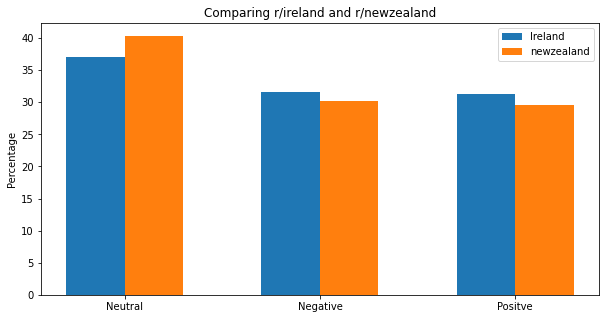

In [31]:
comments_counts_nz = df_comments_newzealand.label.value_counts(normalize=True) * 100
comments_counts_ireland =  df_comments_ireland.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (comments_counts_ireland)
orange_bar = (comments_counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [32]:
df_comments_ireland.head(10)

,neg,neu,pos,compound,comment,label
0,0.000,1.000,0.000,0.0000,Scotland and Ireland joint hosts in 2030 LETS ...,0
1,0.000,0.693,0.307,0.4767,We need to abolish Real Estate Investment Trusts.,1
2,0.000,0.690,0.310,0.2023,Boris's sanctions should solve everything.....,1
3,0.140,0.833,0.027,-0.9741,"I had one landlord, a property company who's m...",-1
4,0.115,0.718,0.167,0.3378,"How can you help? You can talk about it, you c...",1
5,0.000,0.773,0.227,0.6249,"Awh Jesus, I've always said it, the Croatians ...",1
6,0.000,1.000,0.000,0.0000,If you don't know what a bell pepper is the is...,0
7,0.714,0.286,0.000,-0.3612,That sucks.,-1
8,0.000,1.000,0.000,0.0000,Where’s the Shannon in this pic tho,0
9,0.068,0.932,0.000,-0.5113,How about your salary is taken into account bu...,-1


In [33]:
df_comments_ireland.describe()

,neg,neu,pos,compound,label
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.111438,0.742212,0.142296,0.036248,0.053872
std,0.163258,0.219192,0.183788,0.503418,0.827301
min,0.000000,0.000000,0.000000,-0.986200,-1.000000
25%,0.000000,0.612000,0.000000,-0.361200,-1.000000
50%,0.026000,0.773000,0.076000,0.000000,0.000000
75%,0.167000,0.917000,0.222000,0.440400,1.000000
max,1.000000,1.000000,1.000000,0.987400,1.000000


In [34]:
df_comments_newzealand.describe()

,neg,neu,pos,compound,label
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.106790,0.748525,0.142763,0.069173,0.107692
std,0.150094,0.198693,0.164744,0.529840,0.829193
min,0.000000,0.000000,0.000000,-0.991400,-1.000000
25%,0.000000,0.640750,0.000000,-0.336100,-1.000000
50%,0.051500,0.766000,0.107000,0.000000,0.000000
75%,0.167000,0.887000,0.216000,0.526700,1.000000
max,1.000000,1.000000,1.000000,0.988500,1.000000


### visualising compound scores for the sub reddits

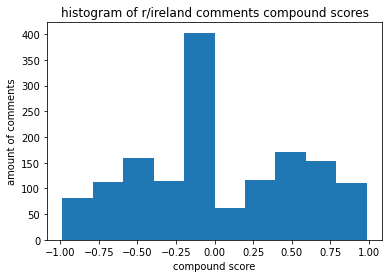

In [38]:
plt.hist(df_comments_ireland["compound"], bins=10)

plt.title('histogram of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

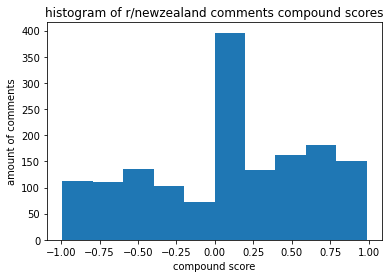

In [40]:
plt.hist(df_comments_newzealand["compound"], bins=10)

plt.title('histogram of r/newzealand comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

## box plots 

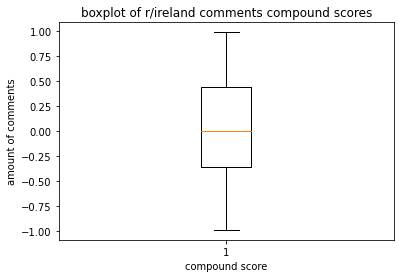

In [41]:
plt.boxplot(df_comments_ireland["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

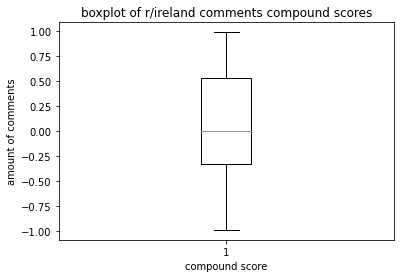

In [42]:
plt.boxplot(df_comments_newzealand["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### looking at positive comments in more detail

In [47]:
pos_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == 1].comment)

pos_tokens_comments_ireland = process_text(pos_comments_ireland)
pos_freq_comments_ireland = nltk.FreqDist(pos_tokens_comments_ireland)

pos_freq_comments_ireland.most_common(20)

[('like', 81),
 ('ireland', 72),
 ('american', 69),
 ('us', 62),
 ('love', 57),
 ('get', 56),
 ('good', 45),
 ('people', 43),
 ('go', 39),
 ('well', 39),
 ('irish', 37),
 ('would', 36),
 ('back', 36),
 ('know', 34),
 ('great', 34),
 ('croatia', 34),
 ('one', 33),
 ('time', 33),
 ('need', 32),
 ('house', 32)]

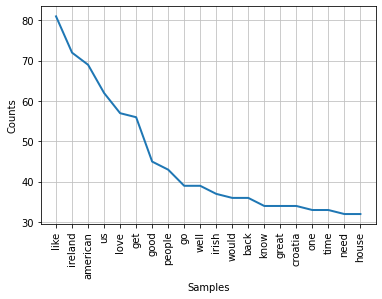

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
pos_freq_comments_ireland.plot(20)


In [48]:
pos_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == 1].comment)

pos_tokens_comments_nz = process_text(pos_comments_nz)
pos_freq_comments_nz = nltk.FreqDist(pos_tokens_comments_nz)

pos_freq_comments_nz.most_common(20)

[('people', 140),
 ('like', 117),
 ('nz', 89),
 ('new', 78),
 ('country', 73),
 ('us', 66),
 ('good', 63),
 ('zealand', 63),
 ('get', 61),
 ('well', 57),
 ('would', 55),
 ('vote', 49),
 ('want', 47),
 ('love', 45),
 ('time', 44),
 ('know', 44),
 ('much', 43),
 ('even', 43),
 ('make', 43),
 ('one', 41)]

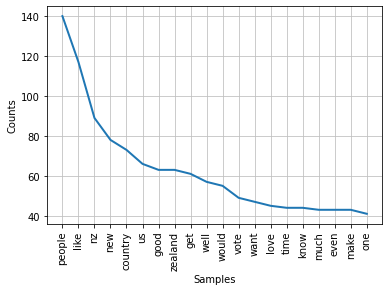

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
pos_freq_comments_nz.plot(20)


### looking at negative comments in more detail

In [51]:
neg_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == -1].comment)

neg_tokens_comments_ireland = process_text(neg_comments_ireland)
neg_freq_comments_ireland = nltk.FreqDist(neg_tokens_comments_ireland)

neg_freq_comments_ireland.most_common(20)

[('us', 83),
 ('american', 73),
 ('people', 66),
 ('fuck', 64),
 ('get', 56),
 ('back', 53),
 ('deposit', 51),
 ('ban', 44),
 ('house', 43),
 ('rent', 42),
 ('ireland', 40),
 ('country', 39),
 ('like', 37),
 ('one', 35),
 ('shit', 34),
 ('fucking', 33),
 ('would', 32),
 ('years', 31),
 ('americans', 30),
 ('going', 29)]

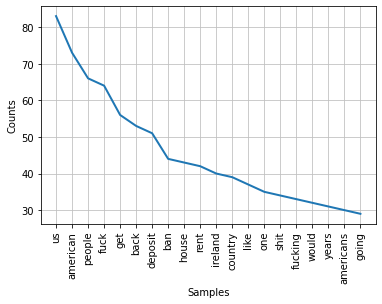

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
neg_freq_comments_ireland.plot(20)


In [53]:
neg_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == -1].comment)

neg_tokens_comments_nz = process_text(neg_comments_nz)
neg_freq_comments_nz = nltk.FreqDist(neg_tokens_comments_nz)

neg_freq_comments_nz.most_common(20)

[('people', 114),
 ('fuck', 74),
 ('like', 59),
 ('shit', 58),
 ('get', 54),
 ('tipping', 49),
 ('new', 48),
 ('nz', 45),
 ('one', 41),
 ('time', 41),
 ('us', 40),
 ('tip', 38),
 ('would', 37),
 ('pay', 35),
 ('fucking', 34),
 ('country', 33),
 ('zealand', 33),
 ('know', 32),
 ('covid', 31),
 ('go', 29)]

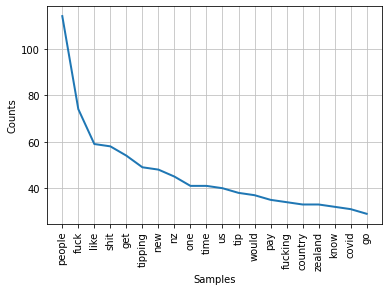

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
neg_freq_comments_nz.plot(20)
